In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
#   Simple Autoencoder

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3848 - val_loss: 0.1884
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1791 - val_loss: 0.1531
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1486 - val_loss: 0.1334
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1314 - val_loss: 0.1208
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1197 - val_loss: 0.1126
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1120 - val_loss: 0.1065
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1066 - val_loss: 0.1023
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1023 - val_loss: 0.0992
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0998 - val_loss: 0.0969
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0977 - val_loss: 0.0954
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0963 - val_loss: 0.0943
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


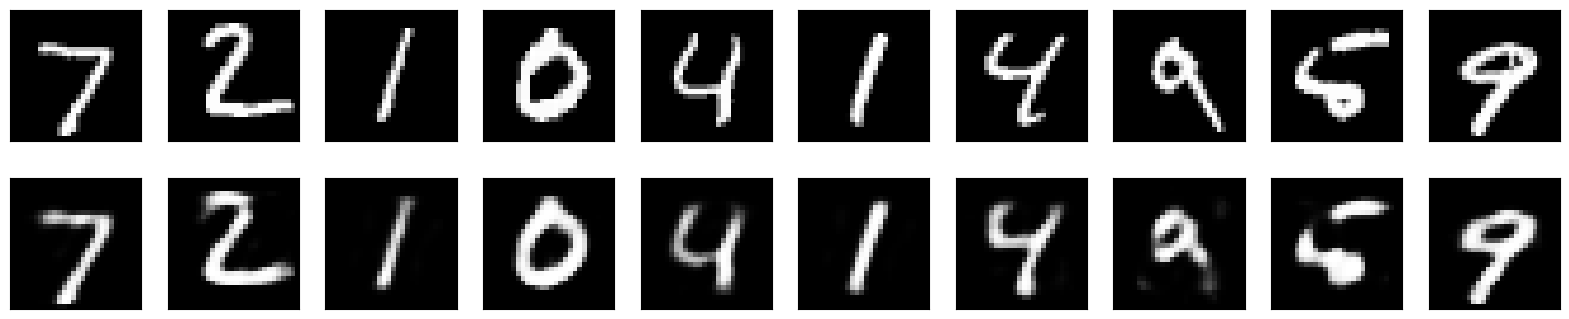

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
#   Deep Encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [11]:
#   Deep Encoder

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3376 - val_loss: 0.1637
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1550 - val_loss: 0.1358
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1338 - val_loss: 0.1230
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1220 - val_loss: 0.1153
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1151 - val_loss: 0.1110
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1109 - val_loss: 0.1070
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1080 - val_loss: 0.1046
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1049 - val_loss: 0.1025
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1010 - val_loss: 0.0988
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0992 - val_loss: 0.0975
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━

In [13]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


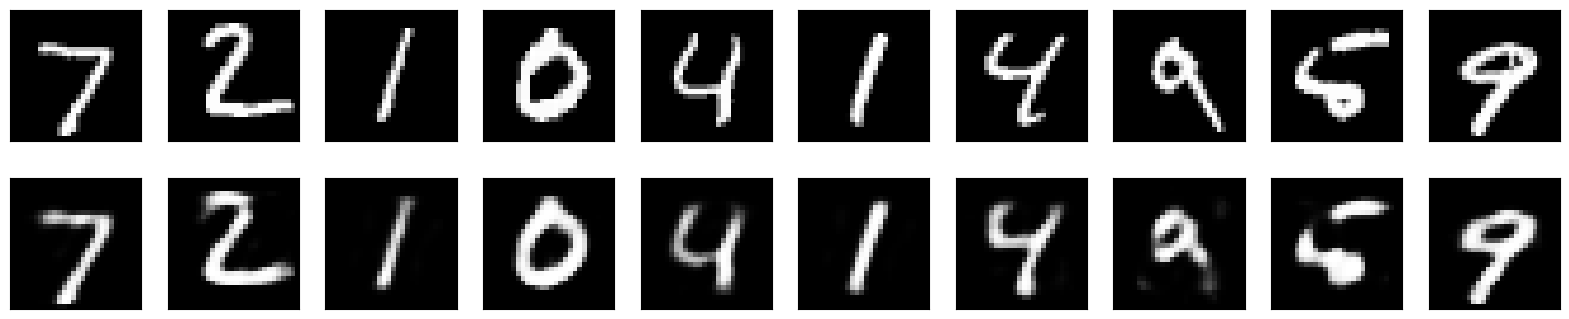

In [14]:
#   Deep Encoder
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()